Outline:
(1) Introduce PDFs (5-10 min)
(2) Introduce random walk and code
(3) 26.1 Part a bullet point 1 - histrograms of random walks
(4) Distorted random walks (higher/lower probability or magnitude in one direction, slowing/increasing magnitude as |y| increases
(5) observe sqrt nature of random walk
(5) 25.7b and motivation in 26.1b

25.7b follows:

Detailed plans for describing diffusion and random walk follow:

To describe diffusion, we shall introduce it as a subset of the random walk. Begin indirectly talking about the PDF by proposing the problem and solution for 24.2a with some additional english. Print out the graph seen in the RandomWalks notebook to demonstrate the random movement of the particles, and show that that graph is like a gaussian when seen as a histogram (Note: Perhaps I could see how a random walk with random float distance up/down works?). One may also motivate the random walk in the (x,y) plane as a example of diffusion on a plane.

# Random Walks & Diffusion - a JuPyter story

Diffusion is the random bouncing brought on  Consider a single particle located in a line of solute:
![title](img/rw.png)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random

def random_walk(n_steps=1000, deltaX = 1, deltaY = 1):
    step_list = [(0,0)]
    up_down_vals = [-1*deltaY,deltaY]
    for n in range(1,n_steps):
        step_list.append((deltaX*n, (step_list[n-1][1] + random.choice(up_down_vals))))
    return step_list

# The Beta Distribution & Random Walks

The code seen below performs one function; counts how many times a random walk is positive, and divides it by the total time of the walk.

In [31]:
def count_positive(n_walks = 100, n_steps = 1000):
    positive_fractions = []
    # We begin by iterating by the given number of walks
    for walk in range(n_walks):
        positive_counter = 0
        # Make a temporary variable for the walk in question
        current_walk = random_walk(n_steps)
        for value in current_walk:
            if value[1] > 0:
                positive_counter += 1
        positive_fractions.append(positive_counter/n_steps)
    return positive_fractions

[10.070879119947094, 3.0531696714487722, 2.2210155716429534, 1.8374304674737469, 1.6060231188228964, 1.4475497090208995, 1.3306144378375531, 1.2399692893027063, 1.1672006815303502, 1.1072376837458848, 1.0568188362874347, 1.0137390779228133, 0.97644732827485858, 0.9438168046325901, 0.91500678724239082, 0.88937570784746978, 0.86642446718834065, 0.84575829621053067, 0.82706039509936935, 0.81007328118845601, 0.79458531684814193, 0.78042079965114941, 0.76743255328573357, 0.75549630666172696, 0.74450637307952183, 0.73437228888560191, 0.7250161700079818, 0.71637061236240307, 0.70837700906014622, 0.70098419044144367, 0.6941473166169746, 0.68782696933266108, 0.68198840252885207, 0.67660092026931606, 0.67163735768205834, 0.66707364582108519, 0.66288844537701275, 0.65906283725734416, 0.6555800604573655, 0.65242528951991441, 0.64958544536204321, 0.64704903442190831, 0.64480601201990018, 0.64284766658686443, 0.64116652202955904, 0.63975625601020214, 0.63861163233718832, 0.63772844601665701, 0.63710

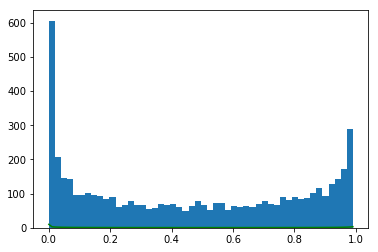

In [50]:
runs = 5000
steps = 100
plt.hist(count_positive(runs, steps),bins=50)

def arcsine_distribution(x_val):
    return 1.0/(np.pi*np.sqrt(x_val*(1-x_val)))

arcsine_range = []

arcsine_domain = np.linspace(0.001,1,steps, endpoint = False)
for x_val in arcsine_domain:
    arcsine_range.append(arcsin_distribution(x_val))
    
print(arcsine_range)

plt.plot(arcsine_domain, arcsine_range, '-g')